# Ejercicio Numpy y Problemas Estadísticos

#### Importar la librería NumPy

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 23')

#### Importar el archivo “supermarket_sales.csv” (https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

In [2]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
726,442-44-6497,C,Naypyitaw,Member,Male,Home and lifestyle,55.57,3,8.3355,175.0455,1/8/2019,11:42,Credit card,166.71,4.761905,8.3355,5.9
415,268-03-6164,B,Mandalay,Normal,Male,Health and beauty,96.11,1,4.8055,100.9155,1/25/2019,16:28,Ewallet,96.11,4.761905,4.8055,7.8
117,659-65-8956,B,Mandalay,Member,Male,Fashion accessories,51.36,1,2.5680,53.9280,1/16/2019,15:26,Ewallet,51.36,4.761905,2.5680,5.2
896,781-84-8059,C,Naypyitaw,Normal,Male,Fashion accessories,60.74,7,21.2590,446.4390,1/18/2019,16:23,Ewallet,425.18,4.761905,21.2590,5.0
42,354-25-5821,B,Mandalay,Member,Female,Sports and travel,69.12,6,20.7360,435.4560,2/8/2019,13:03,Cash,414.72,4.761905,20.7360,5.6


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Generar estadística descriptiva básica en las columnas unit_price y quantity: 
#### Cálculo de la media, mediana, moda

In [6]:
# Para hacer un análisis univariado más completo utilizo numpy
unit_price_np = df[['Unit price']].to_numpy()
quantity_np = df[['Quantity']].to_numpy()

#### estadística descriptiva unit_price

In [7]:
media =unit_price_np.mean()
format_media="{:.2f}".format(media)
print('La media del precio unitario es = $',format_media)

mediana = np.median(unit_price_np)
format_mediana="{:.2f}".format(mediana)
print('La mediana del precio unitario es = $',format_mediana)

vals, counts=np.unique(unit_price_np,return_counts=True)
index=np.argmax(counts) 
moda=vals[index] 
print(f'la moda del precio unitario es = ${moda:.2f}')

La media del precio unitario es = $ 55.67
La mediana del precio unitario es = $ 55.23
la moda del precio unitario es = $83.77


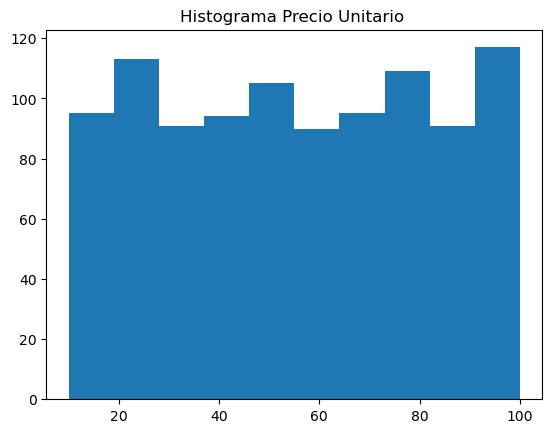

In [8]:
import matplotlib.pyplot as plt
plt.hist(unit_price_np)
plt.title('Histograma Precio Unitario ')
plt.show()

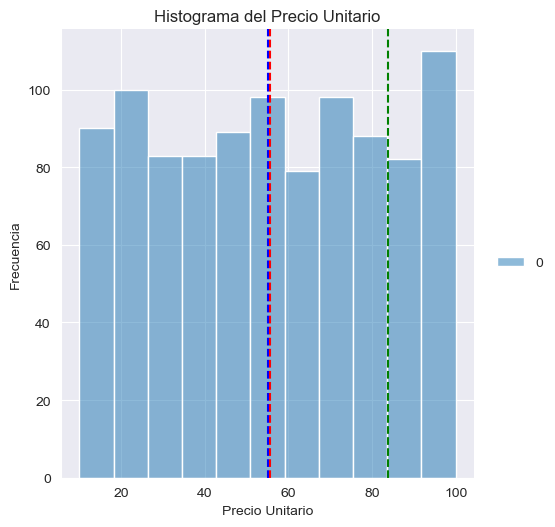

In [9]:
import seaborn as sns

sns.set_style('darkgrid')
sns.displot(unit_price_np)
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio Unitario')
plt.axvline(x=unit_price_np.mean(),color='red', ls='--')
plt.axvline(x=mediana,color='blue',ls='--')
plt.axvline(x=moda,color='green',ls='--')

#### estadística descriptiva quantity

In [10]:
media =quantity_np.mean()
format_media="{:.2f}".format(media)
print('La media de la cantidad de bienes vendidos es =',format_media)

mediana = np.median(quantity_np)
format_mediana="{:.2f}".format(mediana)
print('La mediana de la cantidad de bienes vendidos es =',format_mediana)

vals, counts=np.unique(quantity_np,return_counts=True)
index=np.argmax(counts) 
moda=vals[index] 
print(f'la moda de la cantidad de bienes vendidos es = {moda:.2f}')

La media de la cantidad de bienes vendidos es = 5.51
La mediana de la cantidad de bienes vendidos es = 5.00
la moda de la cantidad de bienes vendidos es = 10.00


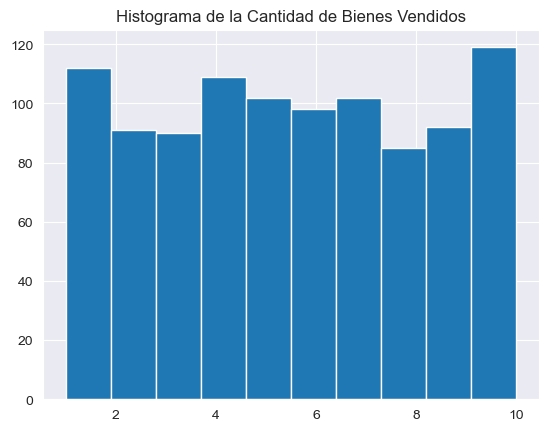

In [11]:
plt.hist(quantity_np)
plt.title('Histograma de la Cantidad de Bienes Vendidos')
plt.show()

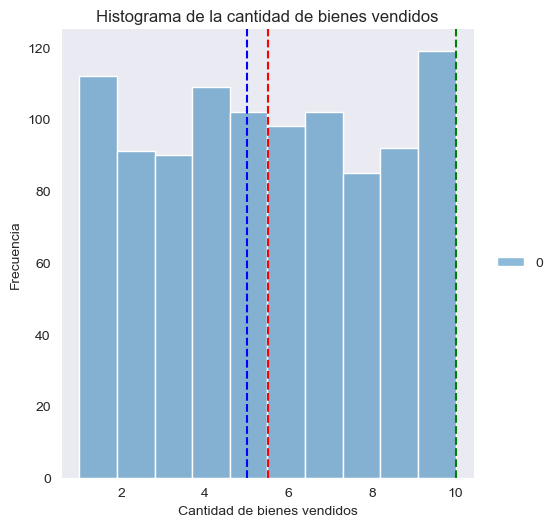

In [12]:
sns.set_style('dark')
sns.displot(quantity_np,bins=10)
plt.xlabel('Cantidad de bienes vendidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de bienes vendidos')
plt.axvline(x=quantity_np.mean(),color='red', ls='--')
plt.axvline(x=mediana,color='blue',ls='--')
plt.axvline(x=moda,color='green',ls='--')

## Obtener el total promedio:

### 1) por ciudad

In [13]:
df_city_mean=df.groupby('City')['Total'].mean().rename('Average of total sales').sort_values(ascending=False).reset_index()
df_city_mean['Average of total sales']=df_city_mean['Average of total sales'].apply(lambda x:round(x,2))
df_city_mean

,City,Average of total sales
0,Naypyitaw,337.10
1,Mandalay,319.87
2,Yangon,312.35


In [14]:
# Para no tener que cambiar el formato de cada línea de código, 
# utilizo la siguiente opción:
pd.options.display.float_format = '{:.2f}'.format

###  2) por product line y ciudad

In [15]:
df_city_productline_mean = pd.pivot_table(df, values='Total', index=['City'], columns=['Product line'], aggfunc=np.mean,margins=True, margins_name='Average of total sales')
df_city_productline_mean.style.background_gradient(cmap='Greens')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Average of total sales
City,,,,,,,
Mandalay,310.026245,264.730911,304.297770,376.993585,350.983290,322.390306,319.872506
Naypyitaw,344.890445,331.693385,360.103864,319.525500,308.790067,350.265067,337.099715
Yangon,305.285225,320.245265,295.915526,268.037298,344.879931,328.350839,312.354031
Average of total sales,319.632538,305.089298,322.671517,323.643020,336.636956,332.065220,322.966749


### 3) por género

In [16]:
df_gender_mean=df.groupby('Gender')['Total'].mean().rename('Average of total sales').sort_values(ascending=False).reset_index()
df_gender_mean

,Gender,Average of total sales
0,Female,335.10
1,Male,310.79


### 4) por género y product line

In [17]:
df_gender_productline_mean = pd.pivot_table(df, values='Total', index=['Gender'], columns=['Product line'], aggfunc=np.mean,margins=True, margins_name='Average of total sales')
df_gender_productline_mean.style.background_gradient(cmap='Greens')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Average of total sales
Gender,,,,,,,
Female,322.643125,317.056250,368.565750,290.015414,380.213639,324.712739,335.095659
Male,316.691965,291.079207,273.499125,348.099460,294.136241,340.360327,310.789226
Average of total sales,319.632538,305.089298,322.671517,323.643020,336.636956,332.065220,322.966749


## Usar el método rank para generar top 5 de:

In [40]:
# Se añadirá una columna al final del dataframe con el número del Ranking.

### 1) ventas por ciudad

In [18]:
city_list=list(df['City'].unique())
city_list

['Yangon', 'Naypyitaw', 'Mandalay']

In [19]:
city_list=list(df['City'].unique())

df_cities=pd.DataFrame()

for city in city_list:
    df_helper= df[df['City']==city]
    df_helper['Rank']=df_helper['Total'].rank(ascending=False)
    df_helper.sort_values(by='Rank',inplace=True)
    df_result=df_helper.head(5)
    df_cities=pd.concat([df_cities,df_result])

df_cities


C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1332603943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper['Rank']=df_helper['Total'].rank(ascending=False)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1332603943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper.sort_values(by='Rank',inplace=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1332603943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rank
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2/8/2019,16:20,Credit card,989.80,4.76,49.49,8.70,1.00
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.33,951.83,3/8/2019,10:53,Ewallet,906.50,4.76,45.33,7.30,2.00
959,384-59-6655,A,Yangon,Member,Female,Food and beverages,98.66,9,44.40,932.34,2/19/2019,15:07,Cash,887.94,4.76,44.40,8.40,3.00
105,704-48-3927,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.34,931.03,1/12/2019,14:50,Ewallet,886.70,4.76,44.34,7.30,4.00
529,827-77-7633,A,Yangon,Normal,Male,Sports and travel,98.09,9,44.14,926.95,2/17/2019,19:41,Cash,882.81,4.76,44.14,9.30,5.00
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.00,4.76,49.65,6.60,1.00
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.20,4.76,49.26,4.50,2.00
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.00,4.76,48.75,8.00,3.00
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.60,1020.71,2/8/2019,13:00,Credit card,972.10,4.76,48.60,8.70,4.00
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.79,1003.59,1/16/2019,13:32,Cash,955.80,4.76,47.79,4.80,5.00


### 2) ventas por member

In [20]:
customer_type_list=list(df['Customer type'].unique())
customer_type_list

['Member', 'Normal']

In [21]:
customer_type_list=list(df['Customer type'].unique())

df_customer_type=pd.DataFrame()

for customer_type in customer_type_list:
    df_helper= df[df['Customer type']==customer_type]
    df_helper['Rank']=df_helper['Total'].rank(ascending=False)
    df_helper.sort_values(by='Rank',inplace=True)
    df_result=df_helper.head(5)
    df_customer_type=pd.concat([df_customer_type,df_result])

df_customer_type

C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1120970538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper['Rank']=df_helper['Total'].rank(ascending=False)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1120970538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper.sort_values(by='Rank',inplace=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\1120970538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rank
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.00,4.76,49.65,6.60,1.00
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.20,4.76,49.26,4.50,2.00
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.60,1020.71,2/8/2019,13:00,Credit card,972.10,4.76,48.60,8.70,3.00
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.33,951.83,3/8/2019,10:53,Ewallet,906.50,4.76,45.33,7.30,4.00
141,280-17-4359,C,Naypyitaw,Member,Male,Health and beauty,90.50,10,45.25,950.25,1/25/2019,13:48,Cash,905.00,4.76,45.25,8.10,5.00
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2/8/2019,16:20,Credit card,989.80,4.76,49.49,8.70,1.00
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.00,4.76,48.75,8.00,2.00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.80,4.76,48.69,4.40,3.00
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.69,1022.38,1/15/2019,13:48,Credit card,973.70,4.76,48.69,4.90,4.00
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.79,1003.59,1/16/2019,13:32,Cash,955.80,4.76,47.79,4.80,5.00


### 3) ventas por payment

In [22]:
payment_list=list(df['Payment'].unique())
payment_list

['Ewallet', 'Cash', 'Credit card']

In [23]:
payment_list=list(df['Payment'].unique())

df_payment=pd.DataFrame()


for payment in payment_list:
    df_helper= df[df['Payment']==payment]
    df_helper['Rank']=df_helper['Total'].rank(ascending=False)
    df_helper.sort_values(by='Rank',inplace=True)
    df_result=df_helper.head(5)
    df_payment=pd.concat([df_payment,df_result])

df_payment

C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\3926951295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper['Rank']=df_helper['Total'].rank(ascending=False)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\3926951295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_helper.sort_values(by='Rank',inplace=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_18952\3926951295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rank
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.20,4.76,49.26,4.50,1.00
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.00,4.76,48.75,8.00,2.00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.80,4.76,48.69,4.40,3.00
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.33,951.83,3/8/2019,10:53,Ewallet,906.50,4.76,45.33,7.30,4.00
435,751-69-0068,C,Naypyitaw,Normal,Male,Sports and travel,99.24,9,44.66,937.82,3/19/2019,19:09,Ewallet,893.16,4.76,44.66,9.00,5.00
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.79,1003.59,1/16/2019,13:32,Cash,955.80,4.76,47.79,4.80,1.00
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.72,1002.12,1/9/2019,13:45,Cash,954.40,4.76,47.72,5.20,2.00
141,280-17-4359,C,Naypyitaw,Member,Male,Health and beauty,90.50,10,45.25,950.25,1/25/2019,13:48,Cash,905.00,4.76,45.25,8.10,3.00
941,702-83-5291,C,Naypyitaw,Member,Male,Fashion accessories,99.82,9,44.92,943.30,3/27/2019,10:43,Cash,898.38,4.76,44.92,6.60,4.00
611,277-35-5865,C,Naypyitaw,Member,Female,Food and beverages,98.97,9,44.54,935.27,3/9/2019,11:23,Cash,890.73,4.76,44.54,6.70,5.00


### Obtener además el % de aporte de cada categoría. 

### por branch

In [24]:
df_branchpct=df.groupby('Branch')['Total'].sum().reset_index()
df_branchpct['Percent']=(df_branchpct['Total']/df_branchpct['Total'].sum())*100
df_branchpct

,Branch,Total,Percent
0,A,106200.37,32.88
1,B,106197.67,32.88
2,C,110568.71,34.24


In [25]:
import plotly.express as px
fig = px.pie(df,names='Branch',values='Total', title='Porcentaje de cada branch con respecto al total de ventas' )
fig.show()

### por ciudad

In [26]:
df_citypct=df.groupby('City')['Total'].sum().reset_index()
df_citypct['Percent']=(df_citypct['Total']/df_citypct['Total'].sum())*100
df_citypct

,City,Total,Percent
0,Mandalay,106197.67,32.88
1,Naypyitaw,110568.71,34.24
2,Yangon,106200.37,32.88


In [27]:
fig = px.pie(df,names='City',values='Total', title='Porcentaje de cada ciudad con respecto al total de ventas' )
fig.show()

### por tipo de cliente

In [28]:
df_customer_typepct=df.groupby('Customer type')['Total'].sum().reset_index()
df_customer_typepct['Percent']=(df_customer_typepct['Total']/df_customer_typepct['Total'].sum())*100
df_customer_typepct

,Customer type,Total,Percent
0,Member,164223.44,50.85
1,Normal,158743.30,49.15


In [29]:
fig = px.pie(df,names='Customer type',values='Total', title='Porcentaje del tipo de cliente con respecto al total de ventas' )
fig.show()

### por género

In [30]:
df_genderpct=df.groupby('Gender')['Total'].sum().reset_index()
df_genderpct['Percent']=(df_genderpct['Total']/df_genderpct['Total'].sum())*100
df_genderpct

,Gender,Total,Percent
0,Female,167882.92,51.98
1,Male,155083.82,48.02


In [31]:
fig = px.pie(df,names='Gender',values='Total', title='Porcentaje por genero con respecto al total de ventas' )
fig.show()

### por línea de productos

In [32]:
df_product_linepct=df.groupby('Product line')['Total'].sum().reset_index()
df_product_linepct['Percent']=(df_product_linepct['Total']/df_product_linepct['Total'].sum())*100
df_product_linepct

,Product line,Total,Percent
0,Electronic accessories,54337.53,16.82
1,Fashion accessories,54305.89,16.81
2,Food and beverages,56144.84,17.38
3,Health and beauty,49193.74,15.23
4,Home and lifestyle,53861.91,16.68
5,Sports and travel,55122.83,17.07


In [33]:
fig = px.pie(df,names='Product line',values='Total', title='Porcentaje de cada linea de producto con respecto al total de ventas' )
fig.show()

### por metodo de pago

In [34]:
df_paymentpct=df.groupby('Payment')['Total'].sum().reset_index()
df_paymentpct['Percent']=(df_paymentpct['Total']/df_paymentpct['Total'].sum())*100
df_paymentpct

,Payment,Total,Percent
0,Cash,112206.57,34.74
1,Credit card,100767.07,31.20
2,Ewallet,109993.11,34.06


In [35]:
fig = px.pie(df,names='Payment',values='Total', title='Porcentaje por forma de pago con respecto al total de ventas' )
fig.show()

### correlación entre la hora (sin minutos) y el total

In [36]:
df[['Hours','Minutes']]=df.Time.str.split(':',expand=True)
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hours,Minutes
488,556-72-8512,C,Naypyitaw,Normal,Male,Home and lifestyle,22.96,1,1.15,24.11,1/30/2019,20:47,Cash,22.96,4.76,1.15,4.30,20,47
415,268-03-6164,B,Mandalay,Normal,Male,Health and beauty,96.11,1,4.81,100.92,1/25/2019,16:28,Ewallet,96.11,4.76,4.81,7.80,16,28
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.94,922.63,3/29/2019,10:25,Ewallet,878.70,4.76,43.94,5.10,10,25
515,413-20-6708,C,Naypyitaw,Member,Female,Fashion accessories,51.47,1,2.57,54.04,3/18/2019,15:52,Ewallet,51.47,4.76,2.57,8.50,15,52
915,717-96-4189,C,Naypyitaw,Normal,Female,Electronic accessories,35.49,6,10.65,223.59,2/2/2019,12:40,Cash,212.94,4.76,10.65,4.10,12,40


In [37]:
df['Hours']=df['Hours'].astype('int64')

In [38]:
df[['Hours','Total']].corr()

# No hay evidencias para justificar una correlación entre la hora y el total de ventas

,Hours,Total
Hours,1.00,-0.00
Total,-0.00,1.00


### correlación entre unit_price y el rating de la transacción

In [39]:
df[['Unit price','Rating']].corr()

# No hay evidencias que justifiquen una posible correlación.
# entre el precio unitario y el rating de la transacción.

,Unit price,Rating
Unit price,1.00,-0.01
Rating,-0.01,1.00
